In [1]:
# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14) # fontsize of the x and y labels
mpl.rc('xtick', labelsize=12) # fontsize of the tick labels x axis
mpl.rc('ytick', labelsize=12) # fontsize of the tick labels y axis


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Linear regression Do-It-Yourself

In [2]:
import numpy as np

X = 5 * np.random.rand(100, 1) # 100 random numbers between 0 and 5
y = 1 + 4 * X + 3*np.random.randn(100, 1) # y = 1 + 4x + Gaussian noise

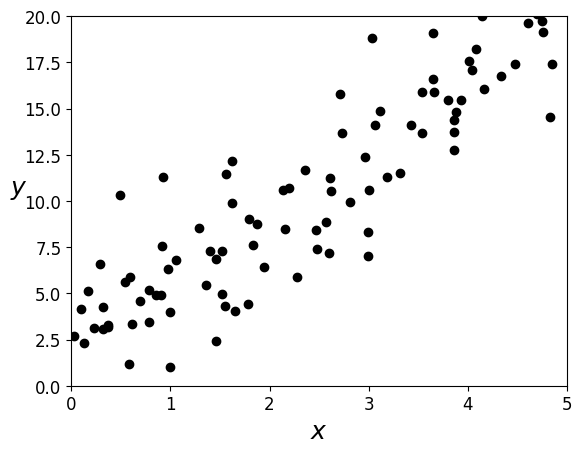

In [3]:
plt.scatter(X, y, color = 'black' ) # plot the data points
plt.xlabel("$x$", fontsize=18) # label the x axis
plt.ylabel("$y$", rotation=0, fontsize=18) # label the y axis
plt.axis([0, 5, 0, 20]) # set the axis limits
plt.show() # show the plot

In [4]:
x_new = np.linspace(0,5,100) # 100 evenly spaced numbers between 0 and 5
theta_1 = 3.5 # set the slope to 3.5
theta_0 = 1.5 # set the intercept to 1.5
y_hyp = theta_1 * x_new + theta_0 # compute the hypothesis

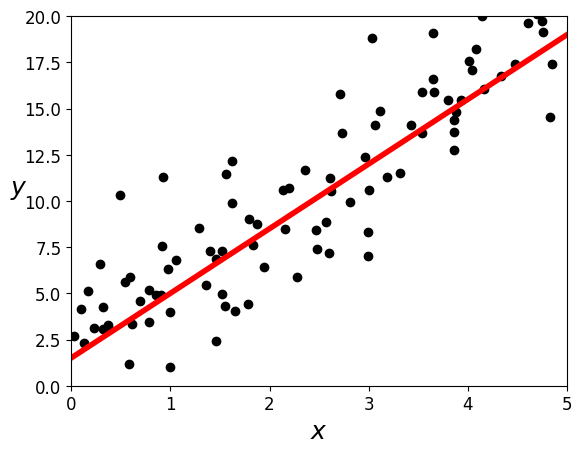

In [5]:
plt.scatter(X, y, color = 'black' ) # plot the data points
plt.plot(x_new, y_hyp, color = 'red', lw = 4) # plot the hypothesis
plt.xlabel("$x$", fontsize=18) # label the x axis
plt.ylabel("$y$", rotation=0, fontsize=18) # label the y axis
plt.axis([0, 5, 0, 20]) # set the axis limits
plt.show() # show the plot

# Linear regression using batch gradient descent

In [6]:
eta = 0.1  # learning rate
n_iterations = 1000 # no of iterations
N = 100 # no of samples


theta_1 = np.random.randn(1) # random initialization
theta_0 = np.random.randn(1) # random initialization

cum_theta1=[] # to store the values of theta_1 at each iteration
cum_theta0=[] # to store the values of theta_0 at each iteration

In [7]:
print("theta_1: ", theta_1) # print the initial value of theta_1
print("theta_0: ", theta_0) # print the initial value of theta_0

theta_1:  [0.01300189]
theta_0:  [1.45353408]


In [8]:
for iteration in range(n_iterations): # loop over the no of iterations
    cum_theta1.append(theta_1) # append the value of theta_1
    cum_theta0.append(theta_0) # append the value of theta_0
    
    gradient_theta_1 = 1/N * np.sum((theta_1*X + theta_0 - y)*X) # compute the gradient of theta_1
    gradient_theta_0 = 1/N * np.sum((theta_1*X + theta_0 - y)) # compute the gradient of theta_0
    
    theta_1 = theta_1 - eta * gradient_theta_1 # update theta_1
    theta_0 = theta_0 - eta * gradient_theta_0 # update theta_0
    
    

In [9]:
print("theta_1: ", theta_1) # print the final value of theta_1
print("theta_0: ", theta_0) # print the final value of theta_0

theta_1:  [3.72413606]
theta_0:  [1.64528847]


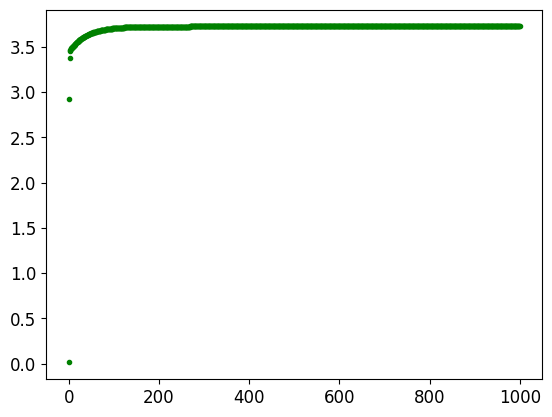

In [10]:
plt.plot(cum_theta1, 'g.') # plot the values of theta_1

In [11]:
from sklearn.linear_model import LinearRegression # import the LinearRegression class

lin_reg = LinearRegression() # create an instance of the LinearRegression class
lin_reg.fit(X, y) # fit the model to the data
print("theta_1: ", lin_reg.coef_) # print the value of theta_1
print("theta_0: ", lin_reg.intercept_) # print the value of theta_0

theta_1:  [[3.72413606]]
theta_0:  [1.64528847]


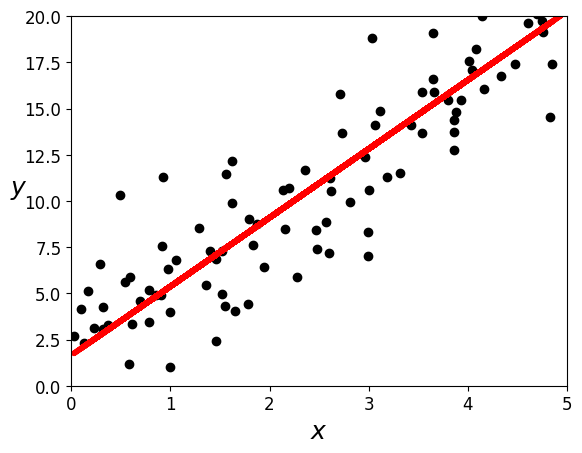

In [12]:
ypred_exact = lin_reg.coef_ * X + lin_reg.intercept_ # compute the hypothesis

plt.scatter(X, y, color = 'black' ) # plot the data points
plt.plot(X, ypred_exact, color = 'red', lw = 4) # plot the hypothesis
plt.xlabel("$x$", fontsize=18) # label the x axis
plt.ylabel("$y$", rotation=0, fontsize=18) # label the y axis
plt.axis([0, 5, 0, 20]) # set the axis limits
plt.show() # show the plot